In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests

In [9]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-08/ipf_lifts.csv'

req = requests.get(URL)

In [10]:
match req.status_code:
    case 200: 
        df = pd.read_csv(URL)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'

In [11]:
df.shape

(41152, 16)

In [12]:
df.head()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
0,Hiroyuki Isagawa,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,205.0,140.0,225.0,1,1985-08-03,IPF,World Games
1,David Mannering,M,SBD,Single-ply,24.0,24-34,NaN,67.5,67.5,225.0,132.5,235.0,2,1985-08-03,IPF,World Games
2,Eddy Pengelly,M,SBD,Single-ply,35.5,35-39,NaN,67.5,67.5,245.0,157.5,270.0,3,1985-08-03,IPF,World Games
3,Nanda Talambanua,M,SBD,Single-ply,19.5,20-23,NaN,67.5,67.5,195.0,110.0,240.0,4,1985-08-03,IPF,World Games
4,Göran Henrysson,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,240.0,140.0,215.0,5,1985-08-03,IPF,World Games


In [13]:
df.tail()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
41147,Chien-Hsiung Chao,M,B,Single-ply,NaN,NaN,Open,126.5,125+,NaN,202.5,NaN,12,1995-06-25,IPF,World Bench Press Championships
41148,Oleg Gordynetz,M,B,Single-ply,NaN,NaN,Open,137.5,125+,NaN,202.5,NaN,13,1995-06-25,IPF,World Bench Press Championships
41149,Clive Lambert,M,B,Single-ply,31.5,24-34,Open,142.2,125+,NaN,202.5,NaN,14,1995-06-25,IPF,World Bench Press Championships
41150,Peter Brath,M,B,Single-ply,21.5,20-23,Open,125.5,125+,NaN,180.0,NaN,15,1995-06-25,IPF,World Bench Press Championships
41151,Valery Sidorenko,M,B,Single-ply,38.5,35-39,Open,142.0,125+,NaN,NaN,NaN,DQ,1995-06-25,IPF,World Bench Press Championships


In [14]:
df.sample(5)

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
37084,Carlos Fanelli,M,SBD,Single-ply,41.5,40-44,Masters 1,108.20,110,290.0,170.0,245.0,5,1998-10-06,IPF,World Masters Powerlifting Championships
34219,Patrick Beaupuits,M,SBD,Raw,57.5,55-59,Masters 2,65.26,66,NaN,82.5,165.0,DQ,2016-06-19,IPF,World Classic Powerlifting Championships
5653,P. Jayappa,M,SBD,Single-ply,NaN,NaN,Open,59.10,60,165.0,107.5,185.0,7,1979-11-02,IPF,Men's World Powerlifting Championships
1136,Carl Olav Christoffersen,M,SBD,Single-ply,24.5,24-34,Open,89.20,90,312.5,200.0,295.0,6,1993-11-27,IPF,World Powerlifting Championships
7192,Yuri Takayama,F,SBD,Single-ply,17.5,18-19,Sub-Juniors,67.70,75,100.0,50.0,110.0,6,2006-09-05,IPF,World Sub-Juniors & Juniors Powerlifting Champ...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41152 entries, 0 to 41151
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41152 non-null  object 
 1   sex               41152 non-null  object 
 2   event             41152 non-null  object 
 3   equipment         41152 non-null  object 
 4   age               38246 non-null  float64
 5   age_class         38268 non-null  object 
 6   division          40525 non-null  object 
 7   bodyweight_kg     40965 non-null  float64
 8   weight_class_kg   41151 non-null  object 
 9   best3squat_kg     27454 non-null  float64
 10  best3bench_kg     38690 non-null  float64
 11  best3deadlift_kg  27124 non-null  float64
 12  place             41152 non-null  object 
 13  date              41152 non-null  object 
 14  federation        41152 non-null  object 
 15  meet_name         41152 non-null  object 
dtypes: float64(5), object(11)
memory usage: 

In [16]:
df.describe()

,age,bodyweight_kg,best3squat_kg,best3bench_kg,best3deadlift_kg
count,38246.000000,40965.000000,27454.000000,38690.000000,27124.000000
mean,34.772708,81.148902,217.552650,144.677881,221.835002
std,14.618234,24.930896,74.614728,60.032659,63.717025
min,0.500000,37.290000,-210.000000,-160.000000,-215.000000
25%,22.500000,60.000000,160.000000,97.500000,170.000000
50%,31.500000,75.550000,215.000000,140.000000,222.500000
75%,45.000000,97.300000,270.000000,185.000000,270.000000
max,93.500000,240.000000,490.000000,415.000000,420.000000


In [17]:
df.isnull().sum()

name                    0
sex                     0
event                   0
equipment               0
age                  2906
age_class            2884
division              627
bodyweight_kg         187
weight_class_kg         1
best3squat_kg       13698
best3bench_kg        2462
best3deadlift_kg    14028
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

1. Знайдіть рекорди для кожної статі та кожного підрозділу в кожному з 3-х - жим лежачи(best3bench_kg), присідання(best3squat_kg) та станова тяга(best3deadlift_kg)).

In [18]:
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [19]:
df['division'].unique()

array([nan, 'Open', 'Juniors', 'Light', 'Middle', 'Heavy', 'Super',
       'Sub-Juniors', 'Masters 1', 'Masters 2', 'Masters 3', 'Masters 4',
       'SuperHeavy'], dtype=object)

In [20]:
df.groupby(['sex', 'division'])[['best3squat_kg', 'best3bench_kg', 'best3deadlift_kg']].max()

best3squat_kg  best3bench_kg  best3deadlift_kg
sex division                                                   
F   Heavy                305.0          192.5             248.5
    Juniors              282.5          190.5             252.5
    Light                220.0          150.0             202.5
    Masters 1            245.0          197.5             248.0
    Masters 2            255.0          172.5             227.5
    Masters 3            210.0          140.0             190.0
    Masters 4            135.0          115.0             142.5
    Middle               247.5          170.0             235.0
    Open                 322.5          235.0             270.5
    Sub-Juniors          265.0          170.0             238.0
    Super                267.5          190.0             245.0
    SuperHeavy           310.5          205.0             247.5
M   Heavy                432.0          330.0             382.5
    Juniors              450.0          375.0             377.5
    Light                325.5          217.5             315.0
    Masters 1            405.0          345.0             395.0
    Masters 2            365.0          310.5             335.0
    Masters 3            300.0          260.0             305.0
    Masters 4            235.0          220.0             260.5
    Middle               370.0          268.5             345.0
    Open                 490.0          415.0             407.5
    Sub-Juniors          370.0          310.0             335.0
    Super                465.0          360.0             387.5
    SuperHeavy           475.0          405.0             420.0

<Axes: xlabel='division', ylabel='best3squat_kg'>

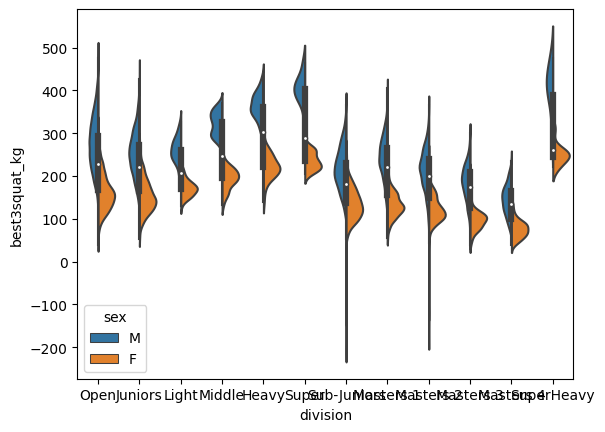

In [21]:
sns.violinplot(data=df, x='division', y='best3squat_kg', hue='sex', split = True)

<Axes: xlabel='best3bench_kg', ylabel='division'>

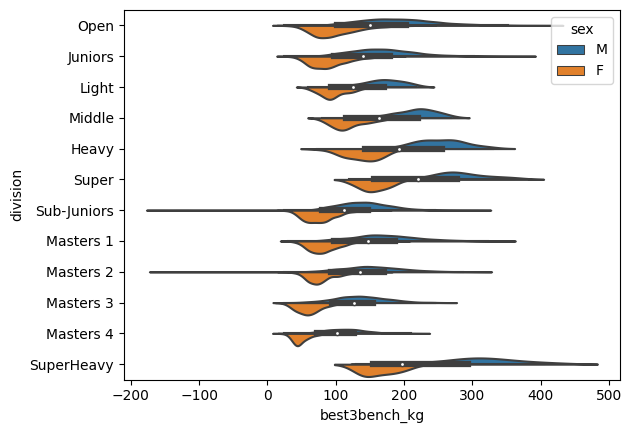

In [22]:
sns.violinplot(data=df, y='division', x='best3bench_kg', hue='sex', split = True)

<Axes: xlabel='best3deadlift_kg', ylabel='division'>

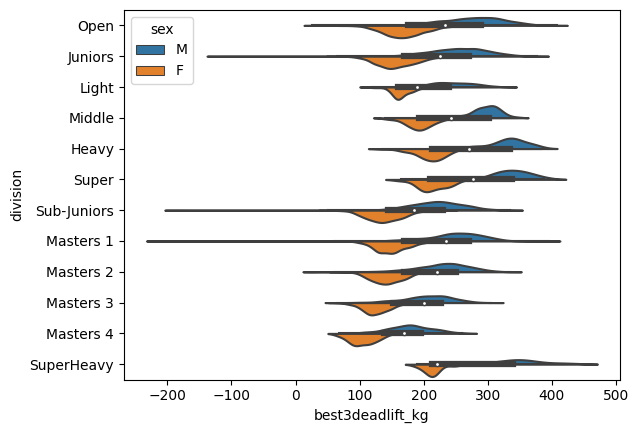

In [23]:
sns.violinplot(data=df, y='division', x='best3deadlift_kg', hue='sex', split = True)

2. Порахуйте кількість перемог кожного учасника, беручи за перемогу 1-е місце. Збережіть результати у новому DataFrame.

In [24]:
df_victories = df[df['place'] == '1']
victories_count = df_victories.groupby('name')['place'].count()
victories_count

name
A Ernandos-Ortega            1
A. Raface                    1
Aarre Käpylä                 2
Ab Wolders                   3
Abdulkarim Karaman           4
                            ..
Éva Makrai                   2
Øyvind Bjørnsen              1
Þórunn Brynja Jónasdóttir    1
Štefan Koľšovský             7
Štěpánka Židová              1
Name: place, Length: 3328, dtype: int64

In [25]:
df2 = pd.merge(df, victories_count, how='left', left_on='name', right_index=True)
df2.head()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place_x,date,federation,meet_name,place_y
0,Hiroyuki Isagawa,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,205.0,140.0,225.0,1,1985-08-03,IPF,World Games,21.0
1,David Mannering,M,SBD,Single-ply,24.0,24-34,NaN,67.5,67.5,225.0,132.5,235.0,2,1985-08-03,IPF,World Games,NaN
2,Eddy Pengelly,M,SBD,Single-ply,35.5,35-39,NaN,67.5,67.5,245.0,157.5,270.0,3,1985-08-03,IPF,World Games,4.0
3,Nanda Talambanua,M,SBD,Single-ply,19.5,20-23,NaN,67.5,67.5,195.0,110.0,240.0,4,1985-08-03,IPF,World Games,4.0
4,Göran Henrysson,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,240.0,140.0,215.0,5,1985-08-03,IPF,World Games,4.0


3. Використовуйте DataFrame з вправи 2, щоб показати для кожної комбінації підрозділу( division ) та статі( sex ), учасника з найбільшою кількістю перемог серед учасників, які будь-коли брали участь у цьому дивізіоні.

In [26]:
max_victories__in_division = df2.groupby(['division', 'sex'])['place_y'].max()
max_victories__in_division

division     sex
Heavy        F      22.0
             M      11.0
Juniors      F      12.0
             M      24.0
Light        F      14.0
             M      28.0
Masters 1    F      22.0
             M      21.0
Masters 2    F      20.0
             M      28.0
Masters 3    F      20.0
             M      21.0
Masters 4    F      16.0
             M      13.0
Middle       F      17.0
             M      21.0
Open         F      22.0
             M      28.0
Sub-Juniors  F      14.0
             M       8.0
Super        F      22.0
             M       8.0
SuperHeavy   F      22.0
             M       8.0
Name: place_y, dtype: float64

In [27]:
df_copy=df2[['division', 'sex', 'place_y', 'name']].copy()
df_copy

,division,sex,place_y,name
0,NaN,M,21.0,Hiroyuki Isagawa
1,NaN,M,NaN,David Mannering
2,NaN,M,4.0,Eddy Pengelly
3,NaN,M,4.0,Nanda Talambanua
4,NaN,M,4.0,Göran Henrysson
...,...,...,...,...
41147,Open,M,NaN,Chien-Hsiung Chao
41148,Open,M,NaN,Oleg Gordynetz
41149,Open,M,NaN,Clive Lambert
41150,Open,M,NaN,Peter Brath


In [29]:
df3 = pd.merge(max_victories__in_division, df_copy, how='inner', left_on=['division', 'sex', 'place_y'], right_on=['division', 'sex', 'place_y'])
df3

,division,sex,place_y,name
0,Heavy,F,22.0,Ielja Strik
1,Heavy,M,11.0,Jan Wegiera
2,Heavy,M,11.0,Jan Wegiera
3,Juniors,F,12.0,Marina Kudinova
4,Juniors,F,12.0,Natalia Salnikova
...,...,...,...,...
150,Super,F,22.0,Ielja Strik
151,Super,M,8.0,Kenneth Sandvik
152,Super,M,8.0,Daisuke Midote
153,SuperHeavy,F,22.0,Ielja Strik


In [30]:
df3.drop_duplicates(inplace = True)
df3

,division,sex,place_y,name
0,Heavy,F,22.0,Ielja Strik
1,Heavy,M,11.0,Jan Wegiera
3,Juniors,F,12.0,Marina Kudinova
4,Juniors,F,12.0,Natalia Salnikova
6,Juniors,F,12.0,Svetlana Tesleva
7,Juniors,F,12.0,Chen-Yeh Chao
13,Juniors,M,24.0,Andrzej Stanaszek
14,Juniors,M,24.0,Sergey Fedosienko
19,Light,F,14.0,Yukako Fukushima
24,Light,M,28.0,Hideaki Inaba


SQL

In [31]:
import sqlite3

In [32]:
conn = sqlite3.connect('sql.db', check_same_thread=False, )
print(conn)

In [34]:
conn = sqlite3.connect('test_database.db')
c = conn.cursor()
c.execute("""CREATE TABLE IF NOT EXISTS competitors 
          (name, sex, event, equipment, age, age_class, division, bodyweight_kg, weight_class_kg, best3squat_kg, best3bench_kg, best3deadlift_kg, place, date, federation, meet_name, wins)""")
conn.commit()
df.to_sql('competitors', conn, if_exists='replace', index=False)
c.execute('''SELECT * FROM competitors''')
print(c.fetchmany(10))

[('Hiroyuki Isagawa', 'M', 'SBD', 'Single-ply', None, None, None, 67.5, '67.5', 205.0, 140.0, 225.0, '1', '1985-08-03', 'IPF', 'World Games'), ('David Mannering', 'M', 'SBD', 'Single-ply', 24.0, '24-34', None, 67.5, '67.5', 225.0, 132.5, 235.0, '2', '1985-08-03', 'IPF', 'World Games'), ('Eddy Pengelly', 'M', 'SBD', 'Single-ply', 35.5, '35-39', None, 67.5, '67.5', 245.0, 157.5, 270.0, '3', '1985-08-03', 'IPF', 'World Games'), ('Nanda Talambanua', 'M', 'SBD', 'Single-ply', 19.5, '20-23', None, 67.5, '67.5', 195.0, 110.0, 240.0, '4', '1985-08-03', 'IPF', 'World Games'), ('Göran Henrysson', 'M', 'SBD', 'Single-ply', None, None, None, 67.5, '67.5', 240.0, 140.0, 215.0, '5', '1985-08-03', 'IPF', 'World Games'), ('PJ Joseph', 'M', 'SBD', 'Single-ply', None, None, None, 67.5, '67.5', 200.0, 100.0, 230.0, '6', '1985-08-03', 'IPF', 'World Games'), ('Wilfried Dörner', 'M', 'SBD', 'Single-ply', 32.5, '24-34', None, 67.5, '67.5', 220.0, 140.0, 235.0, '7', '1985-08-03', 'IPF', 'World Games'), ('Clau

In [38]:
#1. Знайдіть рекорди для кожної статі та кожного підрозділу в кожному з 3-х - жим лежачи(best3bench_kg), 
# присідання(best3squat_kg) та станова тяга(best3deadlift_kg)).
c.execute(
     """SELECT sex, division, max(best3squat_kg), max(best3bench_kg), max(best3deadlift_kg) 
        FROM competitors 
        GROUP BY sex, division""")
exer1 = c.fetchall()

for x in exer1:
    print(x)

('F', None, 245.0, 150.5, 257.5)
('F', 'Heavy', 305.0, 192.5, 248.5)
('F', 'Juniors', 282.5, 190.5, 252.5)
('F', 'Light', 220.0, 150.0, 202.5)
('F', 'Masters 1', 245.0, 197.5, 248.0)
('F', 'Masters 2', 255.0, 172.5, 227.5)
('F', 'Masters 3', 210.0, 140.0, 190.0)
('F', 'Masters 4', 135.0, 115.0, 142.5)
('F', 'Middle', 247.5, 170.0, 235.0)
('F', 'Open', 322.5, 235.0, 270.5)
('F', 'Sub-Juniors', 265.0, 170.0, 238.0)
('F', 'Super', 267.5, 190.0, 245.0)
('F', 'SuperHeavy', 310.5, 205.0, 247.5)
('M', None, 413.0, 255.0, 385.0)
('M', 'Heavy', 432.0, 330.0, 382.5)
('M', 'Juniors', 450.0, 375.0, 377.5)
('M', 'Light', 325.5, 217.5, 315.0)
('M', 'Masters 1', 405.0, 345.0, 395.0)
('M', 'Masters 2', 365.0, 310.5, 335.0)
('M', 'Masters 3', 300.0, 260.0, 305.0)
('M', 'Masters 4', 235.0, 220.0, 260.5)
('M', 'Middle', 370.0, 268.5, 345.0)
('M', 'Open', 490.0, 415.0, 407.5)
('M', 'Sub-Juniors', 370.0, 310.0, 335.0)
('M', 'Super', 465.0, 360.0, 387.5)
('M', 'SuperHeavy', 475.0, 405.0, 420.0)


In [ ]:
#2. Порахуйте кількість перемог кожного учасника, беручи за перемогу 1-е місце. Збережіть результати у новому DataFrame.
c.execute(
     """SELECT
        FROM competitors all
        LEFT JOIN (     
                SELECT name, count(place)
                FROM competitors
                WHERE place='1'
                GROUP BY name""")
exer2 = cursor.fetchall()
print('Результат третього завдання:')
for x in exer2:
print(x)

In [ ]:
#3. Використовуйте DataFrame з вправи 2, щоб показати для кожної комбінації підрозділу( division ) та статі( sex ), 
# учасника з найбільшою кількістю перемог серед учасників, які будь-коли брали участь у цьому дивізіоні.
cursor.execute(
    """SELECT name, MAX(place_count) as 'Count wins',division,sex
    FROM(SELECT COUNT(place) as place_count,name, division, sex
    FROM competitors
    WHERE place ='1'
    GROUP BY name)
    GROUP BY division,sex""")
exer3 = cursor.fetchall()
print('Результат четвертого завдання:')
for x in exer3:
print(x)
